In [212]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [213]:
# Đặt seed để đảm bảo tính nhất quán
np.random.seed(42)

# Tạo 2000 mẫu chiều cao ngẫu nhiên từ 150cm đến 200cm
heights = np.random.uniform(150, 200, 2000).reshape(-1, 1).flatten()

# Tạo cân nặng theo công thức tuyến tính + nhiễu (normal noise)
weights = 0.9 * heights - 85 + np.random.normal(0, 5, size=heights.shape)

In [214]:
print('Heights:', heights[:5])
print('Weights:', weights[:5])

Heights: [168.72700594 197.53571532 186.59969709 179.93292421 157.80093202]
Weights: [62.46439241 88.64774202 81.80733292 78.77645932 61.58876195]


1. Tính theo công thức mà chúng ta giải được


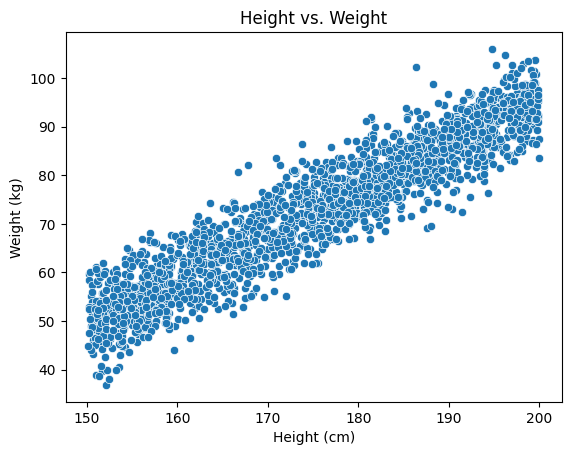

In [215]:
sns.scatterplot(
    x = heights,
    y = weights
)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs. Weight")
plt.show()

In [216]:
# Tìm hệ số m và b của phương trình hồi quy tuyến tính y = m*x + b
x = heights
y = weights
N = x.shape[0]  # Số lượng mẫu dữ liệu
print('Number of samples:', N)
print(x)
print(y)

Number of samples: 2000
[168.72700594 197.53571532 186.59969709 ... 153.44790082 152.85273606
 164.10935373]
[62.46439241 88.64774202 81.80733292 ... 52.92398284 49.9101897
 54.85912123]


![alt text](image.png)

In [217]:
# Công thức tính hệ số m (slope) và b (intercept)
m = (N * np.sum(x * y) - np.sum(x) * np.sum(y)) / (N * np.sum(x ** 2) - (np.sum(x) ** 2))
b = (np.sum(y) - m * np.sum(x)) / N

print(m, b)


0.907059413091245 -86.19670092751772


In [218]:
test_heights = [168, 190, 143, 155, 160, 210]
pred_weights = []
for i in test_heights:
    pred_weights.append(m * i + b)

print(pred_weights)

[66.18928047181146, 86.14458755981883, 43.512795144530315, 54.39750810162525, 58.93280516708148, 104.28577582164374]


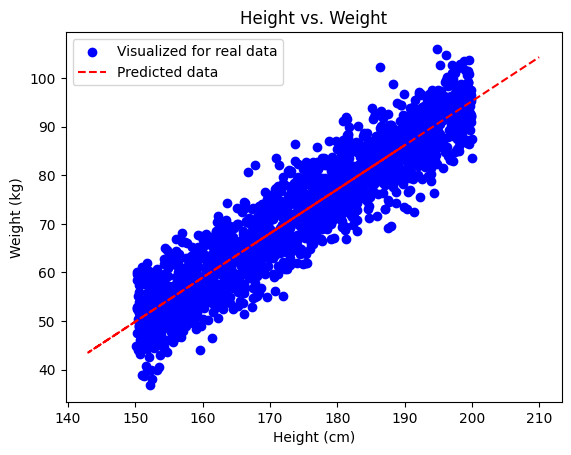

In [219]:
plt.scatter(x, y,color = 'blue', label='Visualized for real data')
plt.plot(test_heights, pred_weights, color='red',linestyle ='--', label='Predicted data')
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs. Weight")
plt.legend()
plt.show()

Dùng hàm có sẵn


In [220]:
model = LinearRegression()
model.fit(x.reshape(-1,1), y.reshape(-1,1))
print('Slope (m):', model.coef_)
print('Intercept (b):', model.intercept_)


Slope (m): [[0.90705941]]
Intercept (b): [-86.19670093]


In [221]:
pred_weights_2 = model.predict(np.array(test_heights).reshape(-1,1))
print(pred_weights_2)

[[ 66.18928047]
 [ 86.14458756]
 [ 43.51279514]
 [ 54.3975081 ]
 [ 58.93280517]
 [104.28577582]]


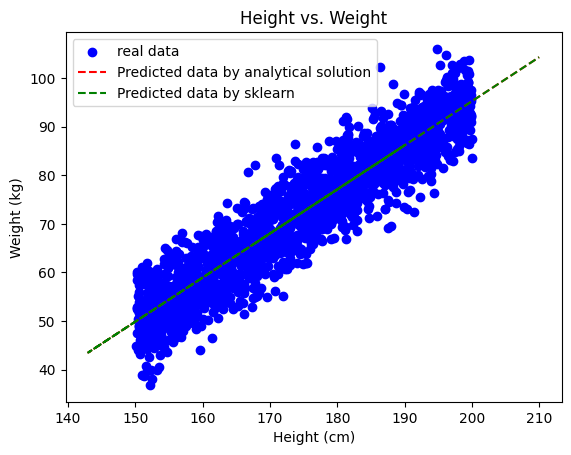

In [222]:
plt.scatter(x, y,color = 'blue', label='real data')
plt.plot(test_heights, pred_weights, color='red',linestyle ='--', label='Predicted data by analytical solution')
plt.plot(test_heights, pred_weights_2, color='green',linestyle ='--', label='Predicted data by sklearn')
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs. Weight")
plt.legend()
plt.show()

In [223]:
heights = np.append(heights,2000)
weights = np.append(weights, 400)

In [224]:
print(heights[5:])
print(weights[5:])

[ 157.79972602  152.90418061  193.30880729 ...  152.85273606  164.10935373
 2000.        ]
[ 53.00385866  60.07720539  87.62230855 ...  49.9101897   54.85912123
 400.        ]


In [225]:
model = LinearRegression()
model.fit(heights.reshape(-1,1), weights.reshape(-1,1))
print('Slope (m):', model.coef_)
print('Intercept (b):', model.intercept_)

Slope (m): [[0.26212293]]
Intercept (b): [26.54783183]


In [226]:
pred_weights_3 = model.predict(np.array(test_heights).reshape(-1,1))

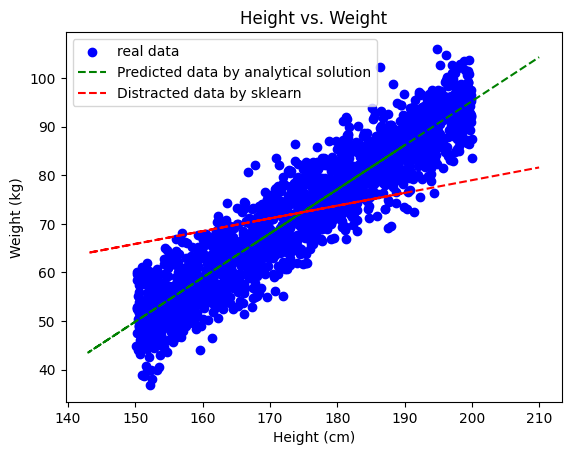

In [227]:
plt.scatter(x, y,color = 'blue', label='real data')
plt.plot(test_heights, pred_weights, color='green',linestyle ='--', label='Predicted data by analytical solution')
plt.plot(test_heights, pred_weights_3, color='red',linestyle ='--', label='Distracted data by sklearn')
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs. Weight")
plt.legend()
plt.show()